In [1]:
from __future__ import division, print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv("Salary_Data.csv")

In [3]:
#data.rename(columns={0: 'year', 1: 'exper'}, inplace=True)

In [4]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


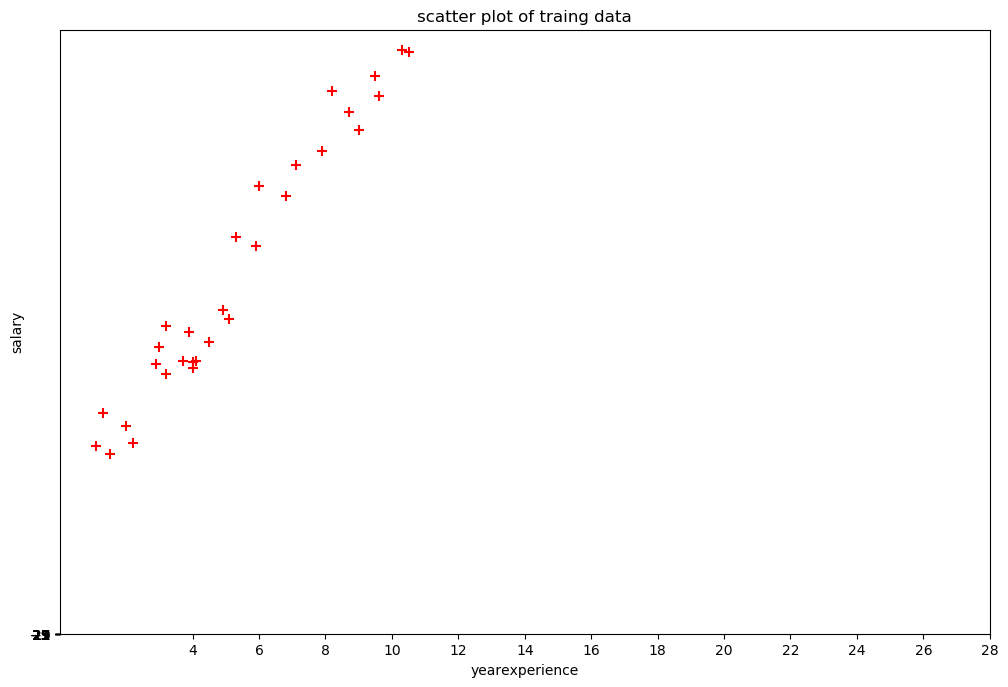

In [5]:
fig=plt.figure(num=None,figsize=(12,8),dpi=100,facecolor="w")
plt.scatter(data['YearsExperience'],data['Salary'],marker='+',color="red",s=50)
plt.xlim(0,25)
plt.xticks(range(4,30,2))
plt.yticks(range(-5,30,2))
plt.xlabel(("yearexperience"))
plt.ylabel("salary")
plt.title("scatter plot of traing data")

plt.show()


In [27]:
class LinearRegression(object):
    """Performs Linear Regression using Batch Gradient
    Descent."""
    def __init__(self, X, y, alpha=0.01, n_iterations=5000):
        """Initialise variables.
        
        Parameters
        ----------
        y : numpy array like, output / dependent variable
        X : numpy array like, input / independent variables
        alpha : float, int. Learning Rate
        n_iterations : Number of maximum iterations to perform
            gradient descent
        """
        self.y = y
        self.X = self._hstack_one(X)
        self.thetas = np.zeros((self.X.shape[1], 1))
        self.n_rows = self.X.shape[0]
        self.alpha = alpha
        self.n_iterations = n_iterations
        print("Cost before fitting: {0:.2f}".format(self.cost()))
       # print("Cost before fitting: {0:.2f}".format(self.cost()))
    @staticmethod
    def _hstack_one(input_matrix):
        """Horizontally stack a column of ones for the coefficients
        of the bias terms
        
        Parameters
        ----------
        input_matrix: numpy array like (N x M). Where N = number of 
            examples. M = Number of features.
        
        Returns
        -------
        numpy array with stacked column of ones (N x M + 1)
        """
        return np.hstack((np.ones((input_matrix.shape[0], 1)),
                              input_matrix))

    def cost(self, ):
        """Calculates the cost of current configuration"""
        return (1 / (2 * self.n_rows)) * np.sum(
            (self.X.dot(self.thetas) - self.y) ** 2)

    def predict(self, new_X):
        """Predict values using current configuration
        
        Parameters
        ----------
        new_X : numpy array like
        """
        
        new_X = self._hstack_one(new_X)
        return new_X.dot(self.thetas)

    def batch_gradient(self, ):
        h = self.X.dot(self.thetas) - self.y
        h = np.multiply(self.X, h)
        h = np.sum(h, axis=0)
        return h.reshape(-1, 1)

    def batch_gradient_descent(self, ):
        alpha_by_m = self.alpha / self.n_rows
        for i in range(self.n_iterations):
            self.thetas = self.thetas - (alpha_by_m * self.batch_gradient())
            cost = self.cost()
            print("Iteration: {0} Loss: {1:.5f}\r".format(i + 1, cost), end="")

X=data["YearsExperience"].values.reshape(-1,1)
Y=data['Salary'].values.reshape(-1,1)
lr=LinearRegression(X,Y)     
print(lr.thetas)
print(lr.n_rows)
print(lr.n_iterations)
print(lr.alpha)

Cost before fitting: 3251477635.37
[[0.]
 [0.]]
30
5000
0.01


In [26]:
lr.cost()

3251477635.366667

In [30]:
lr.batch_gradient()

array([[ -2280090.],
       [-14321961.]])

In [31]:
lr.batch_gradient_descent()

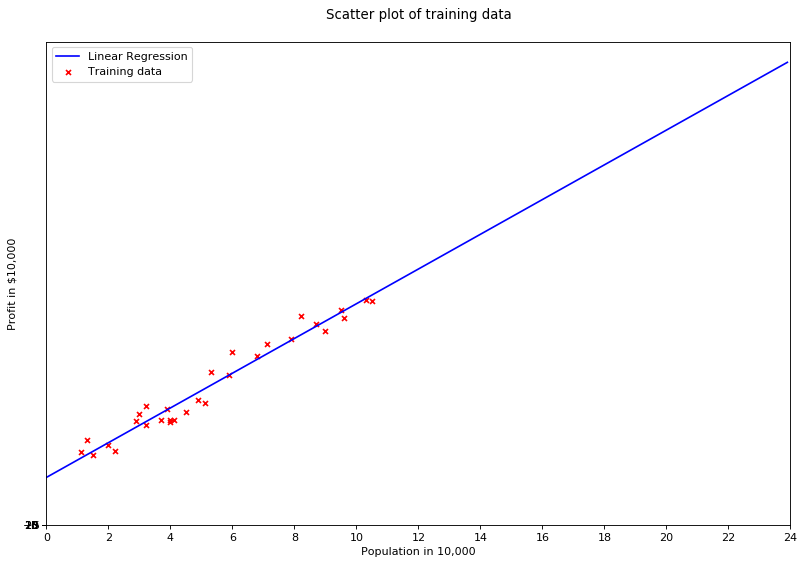

In [37]:
X = np.arange(0, 24, 0.1).reshape(-1, 1)
fig = plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w')
plt.scatter(data['YearsExperience'], data['Salary'], marker='x', color='red', s=20, label='Training data')
plt.plot(X, lr.predict(X), color='blue', label='Linear Regression')
plt.xlim([0, 24])
plt.xticks(range(0, 26, 2))
plt.yticks(range(-5, 30, 5))
plt.xlabel("Population in 10,000")
plt.ylabel("Profit in $10,000")
plt.title("Scatter plot of training data\n")
plt.legend()
plt.show()

In [40]:
def cost(theta_0, theta_1):
    """Calculate the cost with given weights
    
    Parameters
    ----------
    theta_0 : numpy array like, weights dim 0
    theta_1 : numpy array like, weights dim 1
    
    Returns
    -------
    float, cost
    """
    
    X = data['YearsExperience'].values
    y = data['Salary'].values
    X = X.reshape(-1, 1)
    y = y.reshape(-1, 1)
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    n_rows = X.shape[0]
    thetas = np.array([theta_0, theta_1]).reshape(-1, 1)
    return (1/(2*n_rows)) * sum((X.dot(thetas) - y)**2)[0]

def prepare_cost_matrix(theta0_matrix, theta1_matrix):
    """Prepares cost matrix for various weights to 
    create a 3D representation of cost. Every value
    in the cost matrix represents the cost for theta
    values in the theta matrices. 
    
    Parameters
    ----------
    theta0_matrix : numpy array like, weights dim 0
    theta1_matrix : numpy array like, weights dim 1
    """
    J_matrix = np.zeros(theta0_matrix.shape)
    row, col = theta0_matrix.shape 
    for x in range(row):
        for y in range(col):
            J_matrix[x][y] = cost(theta0_matrix[x][y], theta1_matrix[x][y])
    return J_matrix

theta_0 = np.arange(-5, 1, 0.01)
theta_1 = np.arange(0.6, 1.2, 0.001)
theta_0, theta_1 = np.meshgrid(theta_0, theta_1)
J_matrix = prepare_cost_matrix(theta_1, theta_0)

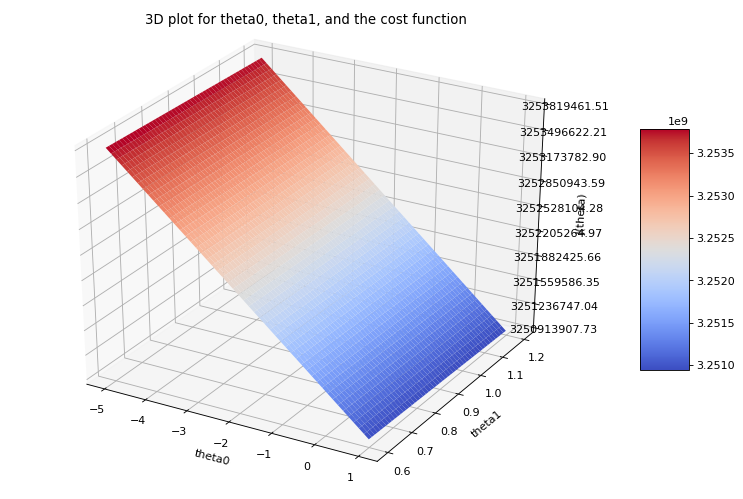

In [41]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w')
ax = fig.gca(projection='3d')

surf = ax.plot_surface(theta_0, theta_1, J_matrix, cmap=cm.coolwarm,)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.set_xlabel("theta0")
ax.set_ylabel("theta1")
ax.set_zlabel("J(theta)")
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title("3D plot for theta0, theta1, and the cost function\n")
plt.show()
